In [1]:
import tensorflow as tf

C:\Users\NAMAN\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
import matplotlib.pyplot as plt
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

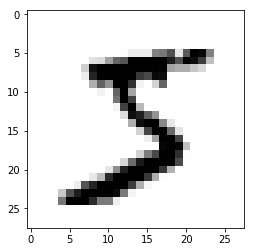

In [5]:
plt.imshow(x_train[0], cmap= plt.cm.binary)
plt.show()

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

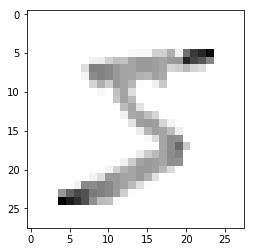

In [7]:
plt.imshow(x_train[0], cmap= plt.cm.binary)
plt.show()

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))  #Output layer.. It only has 10 neurons.. i.e. 0-9

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
60000/60000 [==============================] - 72s 1ms/step - loss: 0.2583 - acc: 0.9250
Epoch 2/3
60000/60000 [==============================] - 17s 278us/step - loss: 0.1038 - acc: 0.9678
Epoch 3/3
60000/60000 [==============================] - 15s 249us/step - loss: 0.0712 - acc: 0.9773


In [9]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 4s 434us/step
0.091132491276972 0.9716


In [10]:
model.save('mnist_tf.model')

In [12]:
new_model = tf.keras.models.load_model('mnist_tf.model')

In [13]:
predictions = new_model.predict([x_test])

In [14]:
print(predictions)

[[2.34067326e-08 4.93168031e-08 4.74146191e-06 ... 9.99728978e-01
  1.11453858e-07 5.52868551e-06]
 [1.26217500e-11 9.19407408e-04 9.99079704e-01 ... 1.28458111e-09
  1.27646885e-07 2.61769773e-13]
 [1.02513205e-07 9.99278247e-01 1.07698776e-04 ... 5.02266885e-05
  5.37306827e-04 8.48947366e-08]
 ...
 [6.06822925e-10 9.47695327e-08 7.79564413e-09 ... 7.80702430e-06
  4.21256982e-06 2.03482719e-04]
 [8.37971243e-07 8.16732665e-07 6.15348839e-08 ... 7.67381465e-08
  5.09981625e-03 1.32207889e-09]
 [1.12571058e-07 5.83852477e-09 1.55989746e-08 ... 3.38076442e-11
  2.64217647e-07 2.76088569e-10]]


In [15]:
import numpy as np

In [16]:
print(np.argmax(predictions[0]))

7


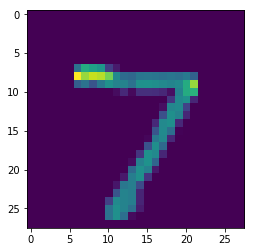

In [17]:
plt.imshow(x_test[0])
plt.show()

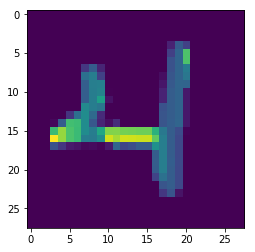

In [23]:
plt.imshow(x_test[103])
plt.show()

In [24]:
print(np.argmax(predictions[103]))

4
